# EasyOCR Detect Words from Images :

#### Aim for using a light weight model detecting words from image [easyOCR API](https://www.jaided.ai/easyocr/documentation/), install [pytorch](https://pytorch.org/) base on your need first

#### Install rest of modules : 
```CMD
pip install easyocr
conda install conda-forge::matplotlib opencv
```

In [12]:
import easyocr
reader = easyocr.Reader(['en'], gpu=False)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [33]:
# img_url ='https://americantrailerrentals.com/wp-content/uploads/2018/09/shipping-container-number-on-door1.jpg'
# img_url ='https://americantrailerrentals.com/wp-content/uploads/2018/09/shipping-container-number1.jpg'
image_path = './TruckData/Outbound_001.jpg'
result = reader.readtext(image_path)
result_2 = reader.readtext(image_path, detail = 0)
result_3 = reader.readtext(image_path, detail = 0, paragraph=True)

In [23]:
print(result)

[([[266, 108], [308, 108], [308, 134], [266, 134]], '4561', 0.945950984954834), ([[222, 194], [254, 194], [254, 218], [222, 218]], 'TrE', 0.44199083033586123), ([[222, 224], [272, 224], [272, 250], [222, 250]], "CU' CAP .", 0.4245777876619337), ([[263.1708677174509, 87.6221280326862], [322.5187104714565, 78.37024616552817], [325.8291322825491, 105.3778719673138], [266.4812895285435, 114.62975383447183]], '900868 |', 0.4109506406132909), ([[224.94000211999364, 97.30400339198982], [266.6571779373828, 92.88028517744402], [269.05999788000634, 116.69599660801018], [226.34282206261716, 120.11971482255598]], 'FAMU', 0.8779565691947937), ([[219.2562854188427, 179.5587995863798], [268.4961508830135, 173.3358994113243], [271.7437145811573, 198.4412004136202], [221.50384911698646, 204.6641005886757]], 'MX GR, ', 0.07076696704258159)]


In [24]:
print(result_2)

['4561', 'TrE', "CU' CAP .", '900868 |', 'FAMU', 'MX GR, ']


In [25]:
print(result_3)

['FAMU 900868 | 4561', "MX GR,  TrE CU' CAP ."]


In [37]:
for (bbox, text, prob) in result:
    print(f'Text: {text}, Probability: {prob}')

Text: 4561, Probability: 0.945950984954834
Text: TrE, Probability: 0.44199083033586123
Text: CU' CAP ., Probability: 0.4245777876619337
Text: 900868 |, Probability: 0.4109506406132909
Text: FAMU, Probability: 0.8779565691947937
Text: MX GR, , Probability: 0.07076696704258159


### Draw it out

In [30]:
import matplotlib.pyplot as plt
import cv2

def draw_bounding_boxes(image, detections, threshold=0.25):
    for bbox, text, score in detections:
        if score > threshold:
            cv2.rectangle(image, tuple(map(int, bbox[0])), tuple(map(int, bbox[2])), (0, 255, 0), 5)
            cv2.putText(image, text, tuple(map(int, bbox[0])), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.65, (255, 0, 0), 2)

In [34]:
img = cv2.imread(image_path)
if img is None:
    raise ValueError("Error loading the image. Please check the file path.")

In [35]:
threshold = 0.25
draw_bounding_boxes(img, result, threshold)

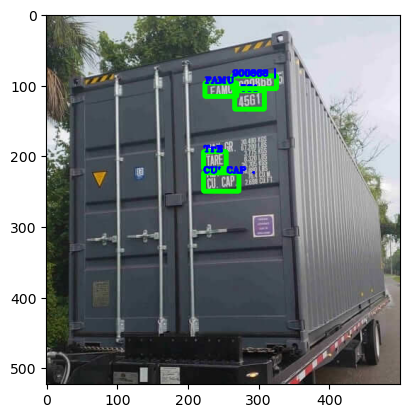

In [36]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))

plt.show()